In [1]:
import numpy as np
import csv

In [2]:
with open("./compare.csv") as f:
    data = np.loadtxt(f, delimiter=',')

In [3]:
print(data[1,:])

[-96. -96.]


In [4]:
data = data[3:, :]

In [5]:
print(data.shape)
print(1.0 / 15 * data.shape[0])

(70650, 2)
4710.0


In [7]:
data2 = data.reshape((int(data.shape[0] / 15), 15, 2))
print(data2[0, :, :])

[[  2.           2.        ]
 [  3.           3.        ]
 [  6.           6.        ]
 [-92.08984375 -92.08869485]
 [-90.65234375 -90.6522504 ]
 [ -1.9375      -1.93406863]
 [  5.3671875    5.37259127]
 [  0.875        0.87926704]
 [  2.1875       2.19482899]
 [  0.875        0.87926677]
 [  6.7578125    6.7645358 ]
 [  2.859375     2.8636619 ]
 [  2.1875       2.1948289 ]
 [  2.859375     2.86366199]
 [ 24.15625     24.16026414]]


In [16]:
icova = data2[:, 6:, 0].reshape(-1, 3, 3)
icovb = data2[:, 6:, 1].reshape((-1, 3, 3))

In [30]:
cov_norm = np.zeros(icova.shape[0])
for i in range(cov_norm.shape[0]):
    cova = np.linalg.inv(icova[i, :, :])
    covb = np.linalg.inv(icovb[i, :, :])
    errBit = np.argmax(np.abs(cova - covb))
    # print(errBit)
    cov_norm[i] = (cova - covb).reshape(-1)[errBit]
    #cov_norm[i] = np.linalg.norm(cova - covb, ord=np.inf)

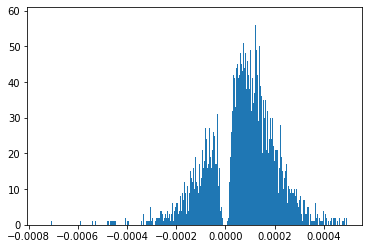

In [35]:
lalala = np.quantile(cov_norm, (0.01, 0.99))
plt.hist(cov_norm, 500, range=lalala)
None

In [8]:
error = data2[:, :, 0] - data2[:, :, 1]
print(error.shape)

(4710, 15)


In [18]:
error_norm = np.linalg.norm(error, ord=np.inf, axis=1)
print(error_norm.shape)

(4710,)


(array([ 6., 19., 13.,  6., 19., 14.,  8., 19.,  5., 15., 25., 21.,  7.,
        10., 20., 16., 15., 18., 12., 15., 14., 20., 24., 27., 18., 21.,
        22., 24., 30., 21., 26., 28., 35., 25., 29., 25., 21., 27., 30.,
        25., 40., 27., 28., 24., 30., 49., 24., 40., 38., 32., 42., 36.,
        28., 43., 41., 32., 38., 42., 39., 31., 48., 39., 36., 32., 41.,
        47., 48., 40., 42., 47., 49., 37., 65., 53., 60., 47., 56., 49.,
        39., 52., 45., 67., 64., 63., 60., 73., 70., 68., 69., 73., 56.,
        69., 71., 65., 67., 90., 65., 67., 80., 80.]),
 array([0.00528976, 0.00531367, 0.00533758, 0.0053615 , 0.00538541,
        0.00540932, 0.00543324, 0.00545715, 0.00548106, 0.00550498,
        0.00552889, 0.0055528 , 0.00557672, 0.00560063, 0.00562454,
        0.00564846, 0.00567237, 0.00569628, 0.0057202 , 0.00574411,
        0.00576802, 0.00579194, 0.00581585, 0.00583976, 0.00586368,
        0.00588759, 0.0059115 , 0.00593542, 0.00595933, 0.00598324,
        0.00600716, 0.0060

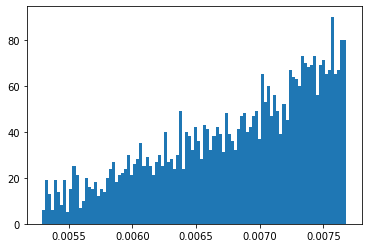

In [19]:
import matplotlib.pyplot as plt
lalala = np.quantile(error_norm, (0.1, 0.9))
plt.hist(error_norm, bins=100, range=lalala)

In [37]:
a = 127.9921875
print(hex(int(a * (1 << 7))))

0x3fff
